In [28]:
! kaggle datasets download -d uciml/iris --unzip

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0




  0%|          | 0.00/3.60k [00:00<?, ?B/s]
100%|██████████| 3.60k/3.60k [00:00<00:00, 3.81MB/s]


In [29]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# import the dataset
df = pd.read_csv('Iris.csv')

In [31]:
# display the first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
# check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
# not a lot of data.. only 150 rows... lets just build a model anyways and see the importance of having a large amount of data

# lets drop the id column
df.drop('Id', axis=1, inplace=True)



In [34]:
# lets just check out teh value distrabution for all the features

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

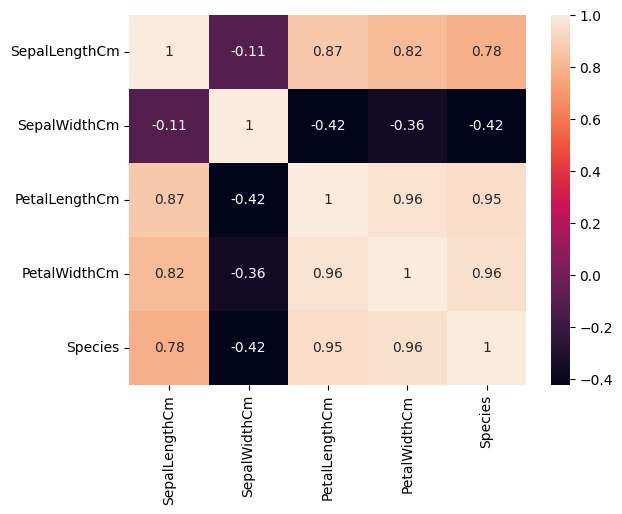

In [35]:
# data does not need to be normalized 

# Lets change the target var to int 
df['Species'] = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# lets check the correlation between the features
sns.heatmap(df.corr(), annot=True)

In [36]:
#Very high corralation between petal length, petal width, and species; sepal width and species have a low correlation but lets keep it and see what happens 

# lets split the data into features and target
y = df['Species']
X = df.drop('Species', axis=1)




In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [39]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# check shape of test and train 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [57]:
# train a decition tree model 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [42]:
# check accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

# check classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



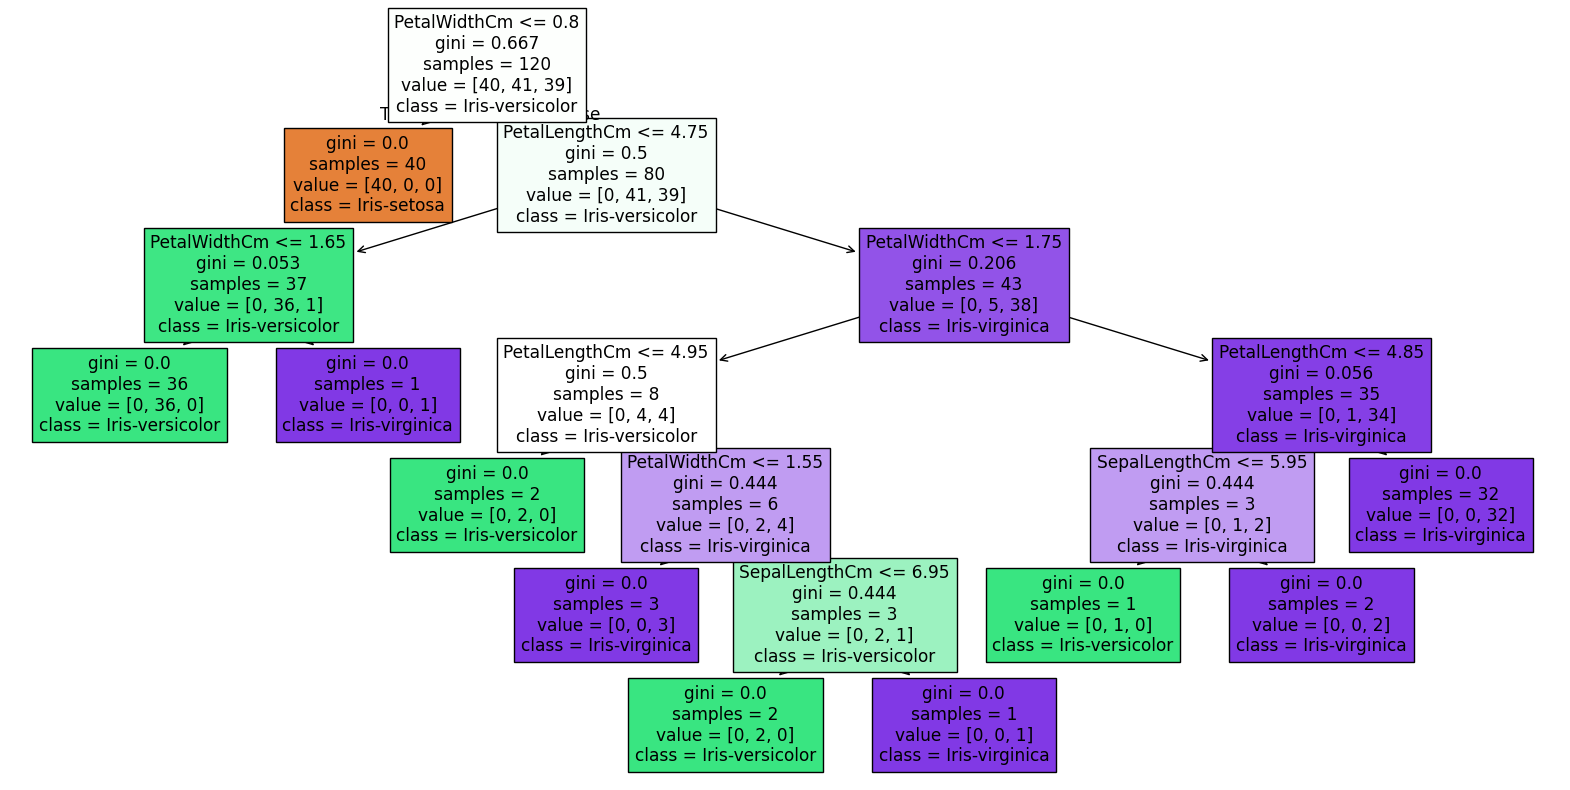

In [45]:
# huh thats very very accurate... lets check the tree out.. 
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True)
plt.show()

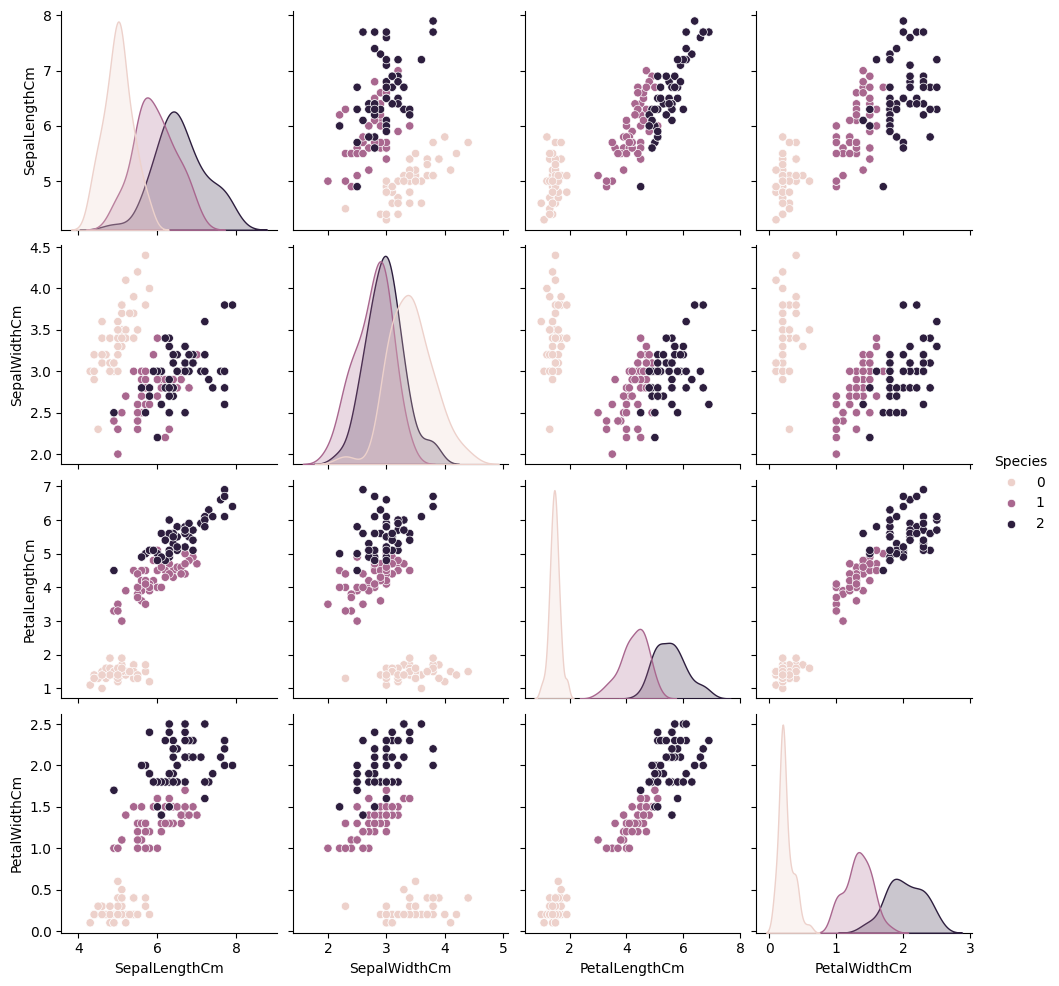

In [46]:
# lets graph all the fetures to undersand teh trend of the data
sns.pairplot(df, hue='Species')

In [56]:
# looking at the graph we can see that the data is very well seperated and that is why the model is so accurate, there is also a very high linear relationship between petal length and petal width
# lets try liner regression and see what happens
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [50]:
# yaa same result... i am getting very suspouis that the model is overfitting the data... and th etesing data is too small to really test the model... lets try a nother dataset
! kaggle datasets list -s "Iris"

ref                                                     title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
uciml/iris                                              Iris Species                                     4KB  2016-09-27 07:38:05         559528       3828  0.7941176        
arshid/iris-flower-dataset                              Iris Flower Dataset                            1010B  2018-03-22 15:18:06         162409        866  0.8235294        
himanshunakrani/iris-dataset                            Iris dataset                                   1006B  2022-07-20 18:50:06          21650        120  1.0              
vikrishnan/iris-dataset                                 Iris Dataset                                    999B  2017-08-03 16:0

In [51]:
#lets try the arshid/iris-flower-dataset 
! kaggle datasets download -d arshid/iris-flower-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/arshid/iris-flower-dataset
License(s): CC0-1.0




  0%|          | 0.00/0.99k [00:00<?, ?B/s]
100%|██████████| 0.99k/0.99k [00:00<00:00, 1.04MB/s]


In [ ]:
# test use teh whoel dataset as testing data on the prevous 2 models 
df = pd.read_csv('IRIS.csv')


In [52]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
#looks like the data is already cleaned and ready to go, lets use thsi to see how our models perform on a larger dataset
big_test_y = df['Species']
big_test_x = df.drop('Species', axis=1)


In [60]:
# now lets use the models we trained on the small dataset on the big dataset
y_pred_1 = model.predict(big_test_x)
accuracy_score(big_test_y, y_pred_1)


1.0

In [61]:
# lets try the lr tree model
y_pred_2 = lr.predict(big_test_x)
accuracy_score(big_test_y, y_pred_2)

0.98

In [63]:
# wow thats a really good model still.. looks liek i did a good job.. pat on the back for me!
# lets compare and contrast the 2 models
print(classification_report(big_test_y, y_pred_1))
print(classification_report(big_test_y, y_pred_2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.94      0.97        50
           2       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [64]:
# lets try a random forest model which is just a bunch of decision trees mashed together
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)


1.0

In [65]:
# oh yay! a model that is 100% accurate! lets cross validate it on the big dataset
y_pred = rf.predict(big_test_x)
accuracy_score(big_test_y, y_pred)

# lets try a classification report to see how well the model is doing actually 

print(classification_report(big_test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [67]:
# turns out the big dataset is also very easy to predict... i guess the iris dataset is just a very easy dataset to predict... pat on the back for me again!

(150,)

In [69]:
# lets try a another cool model called the support vector machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

# lets cross validate it on the big dataset
y_pred = svc.predict(big_test_x)
accuracy_score(big_test_y, y_pred)



0.98

In [70]:
# lets try a classification report to see how well the model is doing actually
print(classification_report(big_test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [71]:
#lets see another dataset to see if we can get a harder dataset to predict
! kaggle datasets list -s "iris"

ref                                                     title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
uciml/iris                                              Iris Species                                     4KB  2016-09-27 07:38:05         559532       3828  0.7941176        
arshid/iris-flower-dataset                              Iris Flower Dataset                            1010B  2018-03-22 15:18:06         162415        866  0.8235294        
himanshunakrani/iris-dataset                            Iris dataset                                   1006B  2022-07-20 18:50:06          21651        120  1.0              
vikrishnan/iris-dataset                                 Iris Dataset                                    999B  2017-08-03 16:0

In [72]:
# ok lets try the iris-dataset that was extened.. how didnt i see this before
! kaggle datasets download -d samybaladram/iris-dataset-extended --unzip

Dataset URL: https://www.kaggle.com/datasets/samybaladram/iris-dataset-extended
License(s): Attribution 4.0 International (CC BY 4.0)




  0%|          | 0.00/107k [00:00<?, ?B/s]
100%|██████████| 107k/107k [00:00<00:00, 1.24MB/s]


In [73]:
df_big_big = pd.read_csv('iris_extended.csv')

In [74]:
# lets see the shape of the data
df_big_big.shape

(1200, 21)

In [75]:
df_big_big.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


In [76]:
df_big_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   species                          1200 non-null   object 
 1   elevation                        1200 non-null   float64
 2   soil_type                        1200 non-null   object 
 3   sepal_length                     1200 non-null   float64
 4   sepal_width                      1200 non-null   float64
 5   petal_length                     1200 non-null   float64
 6   petal_width                      1200 non-null   float64
 7   sepal_area                       1200 non-null   float64
 8   petal_area                       1200 non-null   float64
 9   sepal_aspect_ratio               1200 non-null   float64
 10  petal_aspect_ratio               1200 non-null   float64
 11  sepal_to_petal_length_ratio      1200 non-null   float64
 12  sepal_to_petal_width

In [77]:
# ok that looks bad.... lets clean the data to teh parameters trained on 
#SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm	
df_filtered = df_big_big[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']]

In [91]:
df_filtered_y = df_filtered['species']
df_filtered_x = df_filtered.drop('species', axis=1)

In [92]:
df_filtered_y

0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
          ...    
1195    virginica
1196    virginica
1197    virginica
1198    virginica
1199    virginica
Name: species, Length: 1200, dtype: object

In [95]:
# lets rename all the columns to match the trained data
df_filtered_x.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# lets edit the target var to match the trained data using a lib 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_filtered_y = le.fit_transform(df_filtered_y)

In [96]:
df_filtered_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
# lets check for nan values
df_filtered.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [87]:
# now lets look at nan values 
df_filtered.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [89]:
df_filtered_x.head()
#df_filtered_y.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.16,3.41,1.64,0.26
1,5.48,4.05,1.53,0.37
2,5.10,2.80,1.47,0.38
3,4.64,3.44,1.53,0.17
4,4.85,2.87,1.23,0.26


In [99]:
# now lets check the classifiaction report of the models on this dataset
y_pred = model.predict(df_filtered_x)
accuracy_score(df_filtered_y, y_pred)
print(classification_report(df_filtered_y, y_pred))

y_pred = lr.predict(df_filtered_x)
accuracy_score(df_filtered_y, y_pred)
print(classification_report(df_filtered_y, y_pred))

y_pred = rf.predict(df_filtered_x)
accuracy_score(df_filtered_y, y_pred)
print(classification_report(df_filtered_y, y_pred))

y_pred = svc.predict(df_filtered_x)
accuracy_score(df_filtered_y, y_pred)
print(classification_report(df_filtered_y, y_pred))






              precision    recall  f1-score   support

           0       1.00      0.34      0.50      1200
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.34      1200
   macro avg       0.33      0.11      0.17      1200
weighted avg       1.00      0.34      0.50      1200

              precision    recall  f1-score   support

           0       1.00      0.33      0.50      1200
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.33      1200
   macro avg       0.33      0.11      0.17      1200
weighted avg       1.00      0.33      0.50      1200

              precision    recall  f1-score   support

           0       1.00      0.33      0.50      1200
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy        

c:\Users\kani2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kani2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kani2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

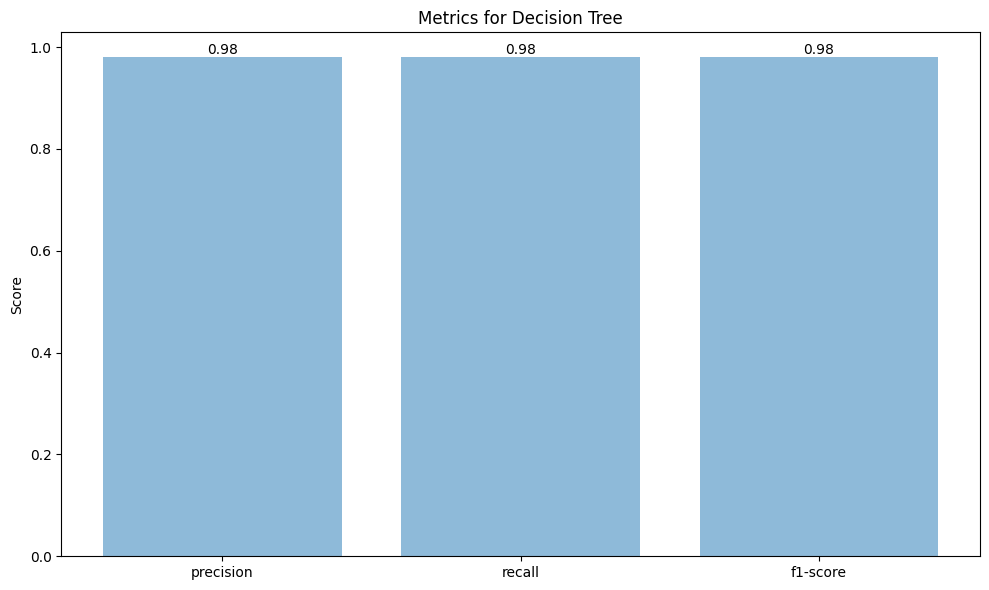

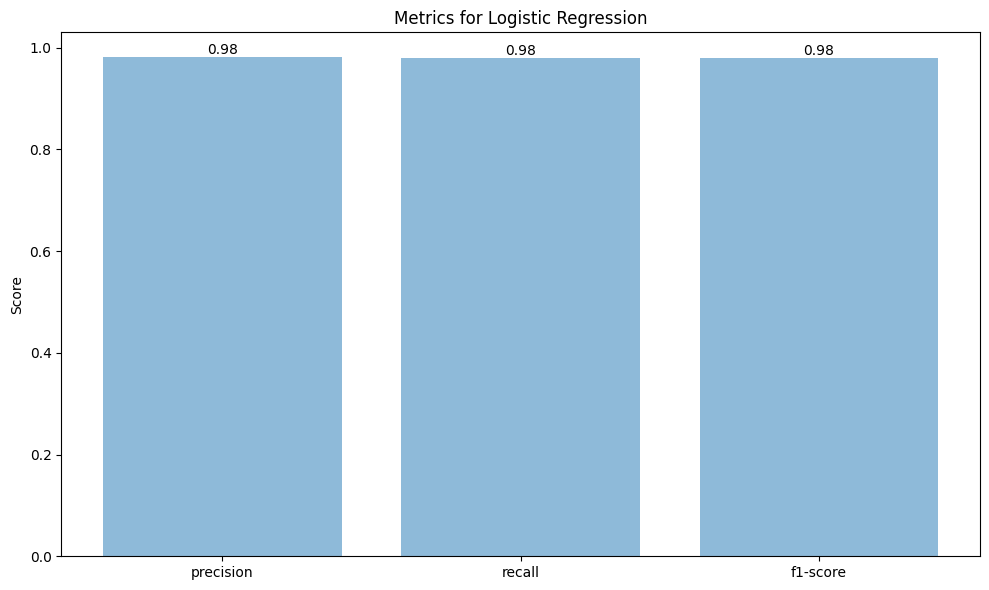

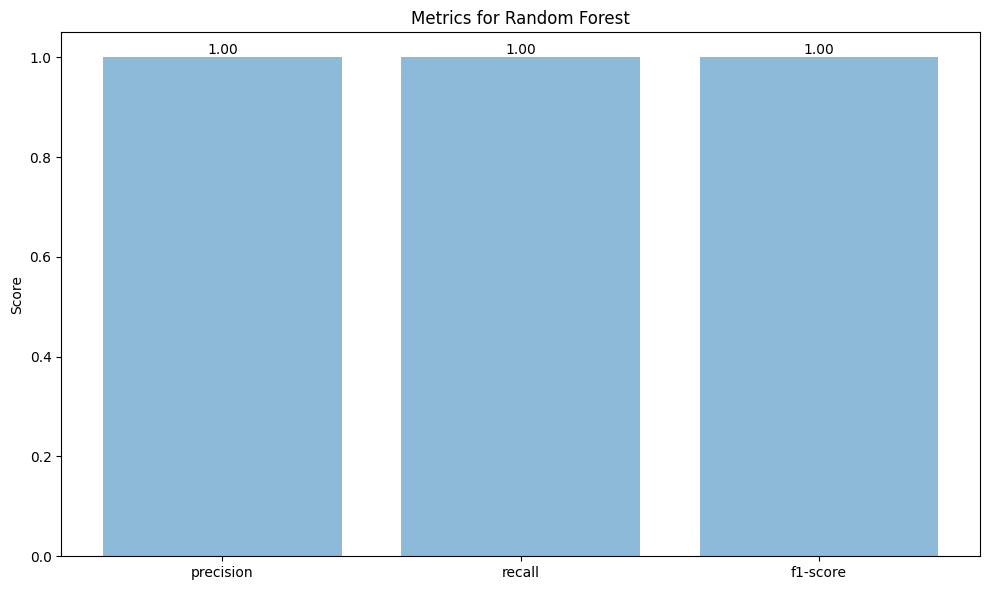

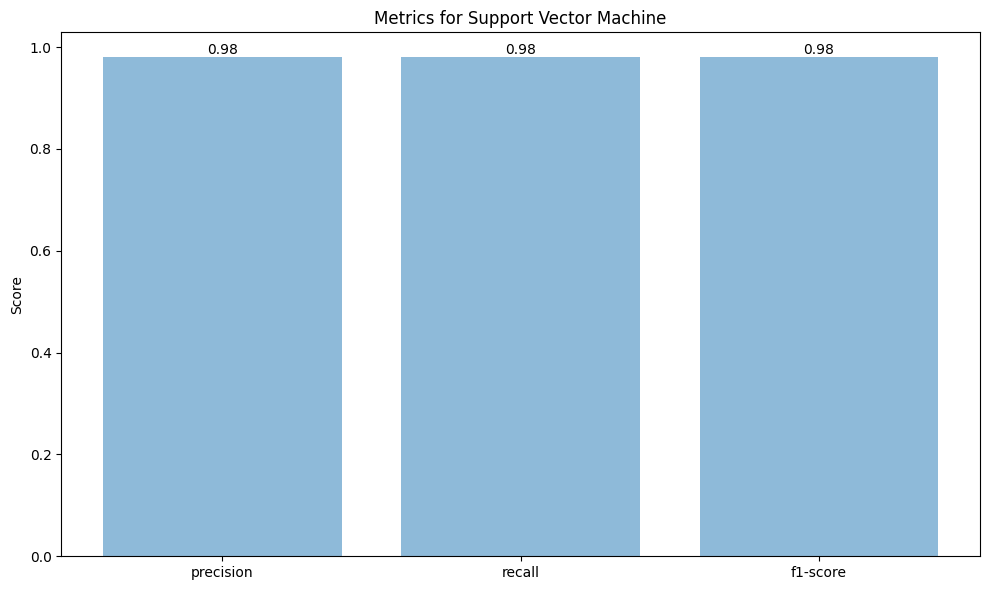

In [104]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

models = [model, lr, rf, svc]
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Support Vector Machine']
metrics = ['precision', 'recall', 'f1-score']

for i, model in enumerate(models):
    try:
        # Ensure the model is fitted
        if not hasattr(model, "predict"):
            print(f"Error: {model_names[i]} is not fitted. Skipping...")
            continue
        
        # Make predictions
        y_pred = model.predict(big_test_x)
        
        # Calculate metrics
        precision, recall, f1, _ = precision_recall_fscore_support(big_test_y, y_pred, average='weighted')
        
        # Create bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        x = np.arange(len(metrics))
        ax.bar(x, [precision, recall, f1], alpha=0.5)
        
        # Customize plot
        ax.set_ylabel('Score')
        ax.set_title(f'Metrics for {model_names[i]}')
        ax.set_xticks(x)
        ax.set_xticklabels(metrics)
        
        # Add value labels on top of each bar
        for j, v in enumerate([precision, recall, f1]):
            ax.text(j, v, f'{v:.2f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error plotting {model_names[i]}: {str(e)}")